# OECD contries clustering

In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
%matplotlib inline

import seaborn as sns

data = pd.read_csv('new_data.csv', encoding='cp949')

['NanumGothic']


In [15]:
data.head()

,국가별,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수
0,헝가리,157.9,123815,115979,9708,117.7,76.1,179.031
1,한국,1725.2,604860,535202,51607,104.5,95.9,115.704
2,핀란드,275.9,75869,78624,5523,111.2,88.9,115.051
3,프랑스,2787.9,581773,671434,64991,108.8,82.0,111.781
4,폴란드,587.1,263494,268880,37922,111.6,77.5,114.101


In [3]:
# data.columns = ['Country', 'GDP', 'Export Amount', 'Imported Amount','Population', 'CPI','Internet Utilization', 'Stock Price Index'  ]

In [5]:
data.head()

,Country,GDP,Export Amount,Imported Amount,Population,CPI,Internet Utilization,Stock Price Index
0,헝가리,157.9,123815,115979,9708,117.7,76.1,179.031
1,한국,1725.2,604860,535202,51607,104.5,95.9,115.704
2,핀란드,275.9,75869,78624,5523,111.2,88.9,115.051
3,프랑스,2787.9,581773,671434,64991,108.8,82.0,111.781
4,폴란드,587.1,263494,268880,37922,111.6,77.5,114.101


In [6]:
data.shape    # 35개의 국가 존재

(35, 8)

In [7]:
data.columns

Index(['Country', 'GDP', 'Export Amount', 'Imported Amount', 'Population',
       'CPI', 'Internet Utilization', 'Stock Price Index'],
      dtype='object')

In [17]:
use = data.drop(['국가별'], axis=1)  # clustering 위함

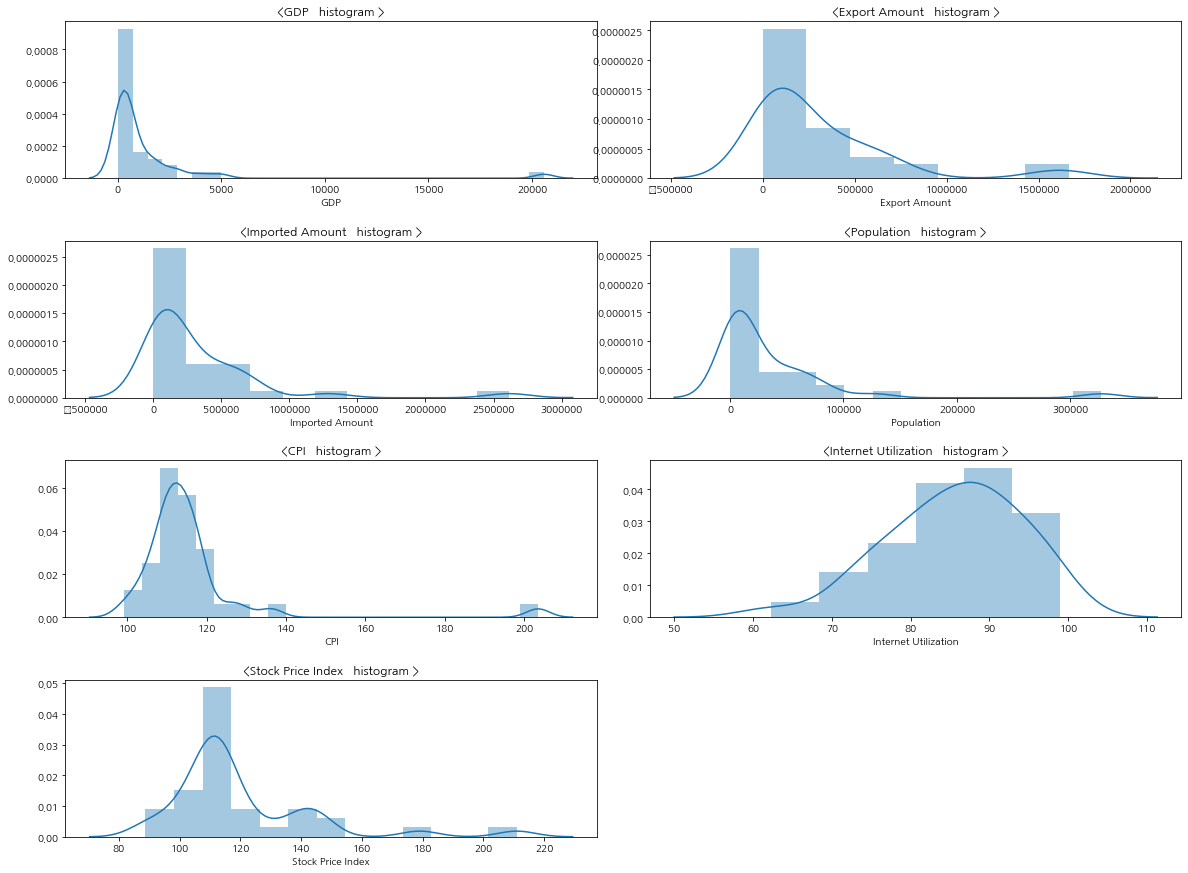

In [10]:
# 변수별 hist plot
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

for i, j in enumerate(use.columns):
    fig.add_subplot(4,2,i+1)
    sns.distplot(data[j])
    plt.title('<' +  j + '   histogram >')

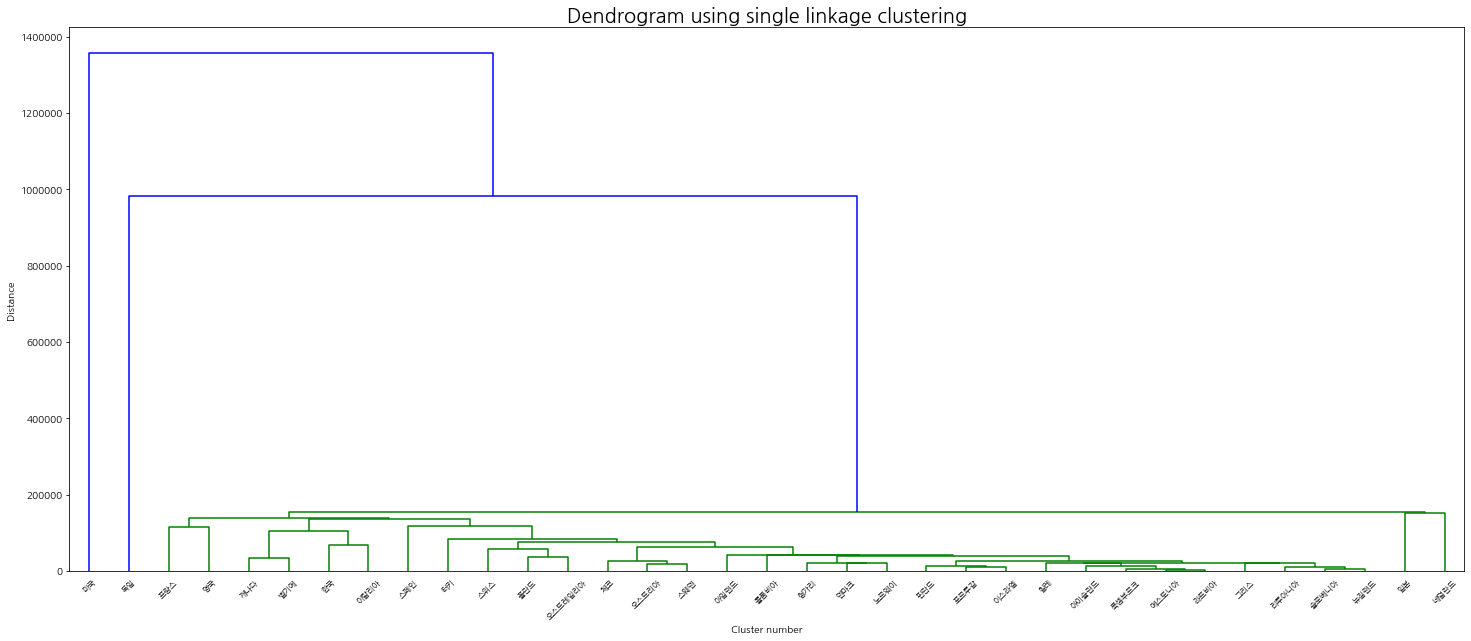

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

labels = list(data['국가별'].values)
fig = plt.figure(figsize=(25, 10))

clu = linkage(use, method='single')  # single linkage
dn = dendrogram(clu, labels=labels)

plt.title('Dendrogram using single linkage clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

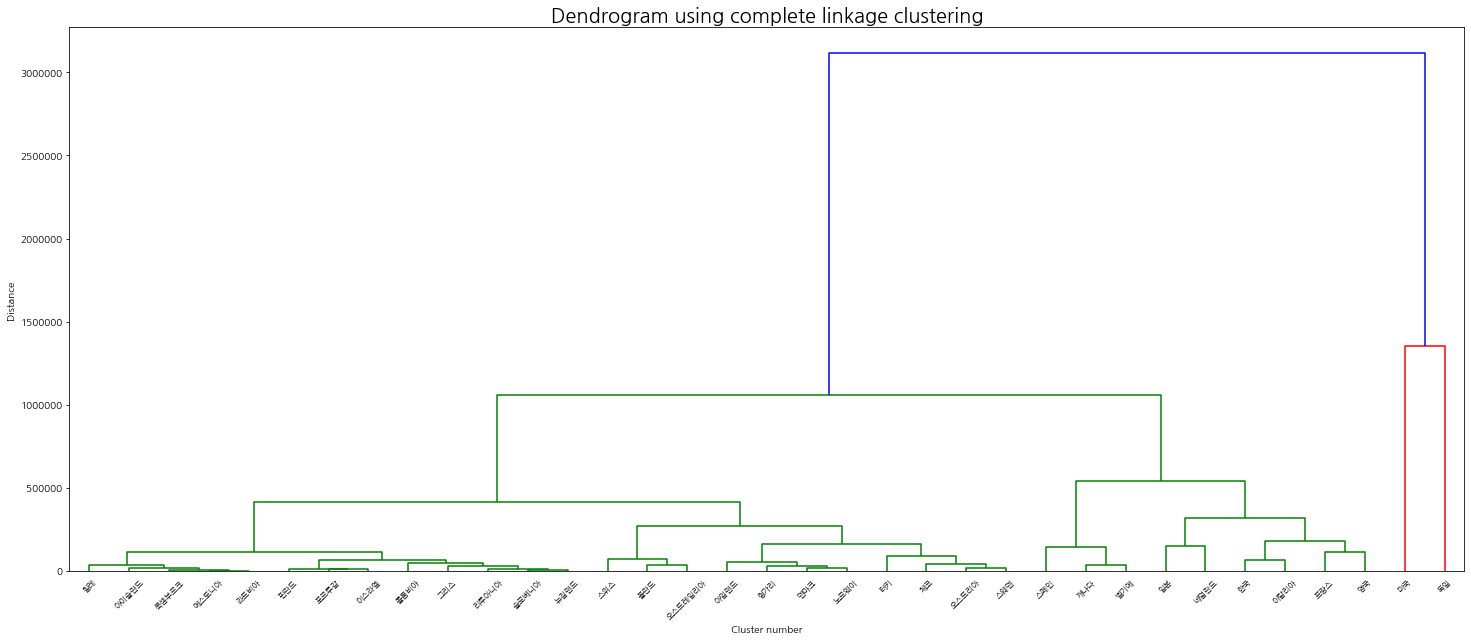

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 10))

clu = linkage(use, method='complete')  # complete linkage
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using complete linkage clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

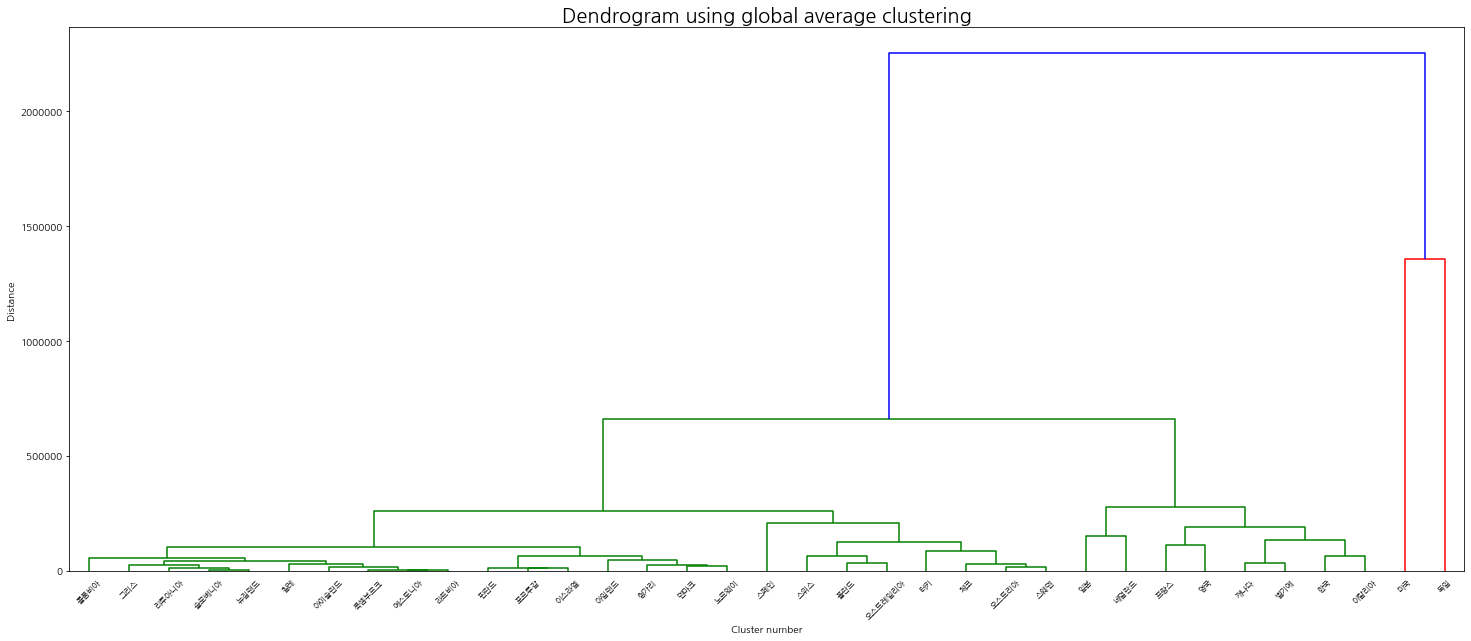

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

clu = linkage(use, method='average')  # complete linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using global average clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit_predict(use)

array([1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1])

In [38]:
km.cluster_centers_

array([[1.22648500e+04, 1.61231100e+06, 1.94933950e+06, 2.05110000e+05,
        1.13200000e+02, 8.85000000e+01, 1.13143000e+02],
       [3.45783333e+02, 1.05178917e+05, 1.04710708e+05, 1.35716250e+04,
        1.17704167e+02, 8.42541667e+01, 1.25188167e+02],
       [2.11191111e+03, 5.47903333e+05, 5.62645111e+05, 5.37643333e+04,
        1.11000000e+02, 8.80333333e+01, 1.07009667e+02]])

In [46]:
center = pd.DataFrame(km.cluster_centers_.reshape(7,3), columns=['group1', 'group2', 'group3'])
# data.columns = ['Country', 'GDP', 'Export Amount', 'Imported Amount','Population', 'CPI','Internet Utilization', 'Stock Price Index'  ]
center['col'] = ['GDP', 'Export Amount', 'Imported Amount','Population', 'CPI','Internet Utilization', 'Stock Price Index']

In [48]:
center.set_index('col')

,group1,group2,group3
col,,,
GDP,12264.850000,1.612311e+06,1.949340e+06
Export Amount,205110.000000,1.132000e+02,8.850000e+01
Imported Amount,113.143000,3.457833e+02,1.051789e+05
Population,104710.708333,1.357162e+04,1.177042e+02
CPI,84.254167,1.251882e+02,2.111911e+03
Internet Utilization,547903.333333,5.626451e+05,5.376433e+04
Stock Price Index,111.000000,8.803333e+01,1.070097e+02


In [43]:
data.columns

Index(['국가별', '국내총생산', '수출액', '수입액', '총인구', '소비자물가지수', '인터넷이용률', '주가지수',
       'kmeans'],
      dtype='object')

In [25]:
data['kmeans'] = km

print('Group1 : ', data.query('kmeans==0')['국가별'].values)
print('='*70)
print('Group2 : ', data.query('kmeans==1')['국가별'].values)
print('='*70)
print('Group3 : ', data.query('kmeans==2')['국가별'].values)

Group1 :  ['미국' '독일']
Group2 :  ['헝가리' '핀란드' '폴란드' '포르투갈' '터키' '콜롬비아' '칠레' '체코' '이스라엘' '오스트리아' '오스트레일리아'
 '에스토니아' '아일랜드' '아이슬란드' '슬로베니아' '스위스' '스웨덴' '리투아니아' '룩셈부르크' '라트비아' '덴마크'
 '뉴질랜드' '노르웨이' '그리스']
Group3 :  ['한국' '프랑스' '캐나다' '일본' '이탈리아' '영국' '스페인' '벨기에' '네덜란드']


In [26]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit_transform(use)

array([[-2.79821347e+05, -9.97079946e+03],
       [ 3.48806360e+05,  1.06483183e+05],
       [-3.39017319e+05, -2.42100168e+04],
       [ 4.42045470e+05,  4.85944660e+03],
       [-7.15917214e+04,  2.02327724e+03],
       [-3.35214888e+05, -3.72082065e+04],
       [-1.63065866e+05, -5.36439860e+04],
       [-3.77708549e+05, -4.34571274e+04],
       [ 2.00842425e+05,  2.98370197e+04],
       [-4.46092979e+05, -3.92190405e+04],
       [-1.76908814e+05,  1.01644160e+04],
       [ 6.04306449e+05,  6.78523398e+04],
       [ 2.87493658e+05,  8.00230023e+04],
       [-3.46762637e+05, -3.58400511e+04],
       [-1.93428406e+05, -8.79583027e+03],
       [-1.02739871e+05,  1.97085154e+04],
       [ 3.56986886e+05, -7.26046430e+04],
       [-4.22236061e+05, -3.37870795e+04],
       [-2.61362799e+05,  2.78337499e+04],
       [-4.38388778e+05, -3.56648947e+04],
       [-3.87300409e+05, -2.65327309e+04],
       [ 7.03943185e+04, -6.91472263e+03],
       [-3.63999985e+04,  3.85312817e+04],
       [-2.

In [27]:
model.explained_variance_ratio_

array([0.97215024, 0.02701917])

In [28]:
pca_data = pd.DataFrame(model.fit_transform(use), columns=['pca_1', 'pca_2'])
pca_data['국가'] = data['국가별']
pca_data['kmeans_pred'] = data['kmeans']

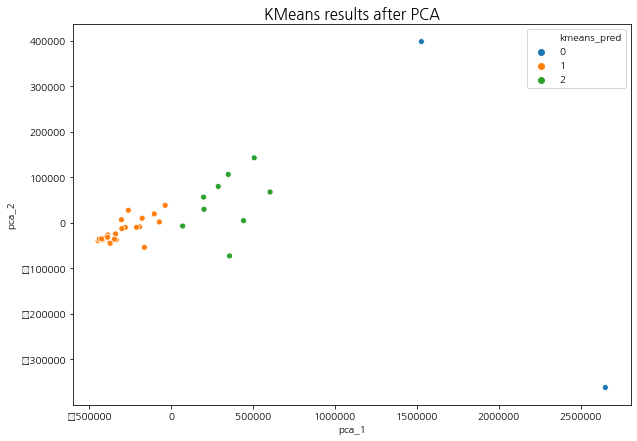

In [29]:
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_1', y='pca_2', data=pca_data, hue='kmeans_pred', palette="tab10")
plt.title('KMeans results after PCA', fontsize=15)
plt.show()

## Except US, Germany

In [145]:
re_data = data.query('국가별 not in ["미국", "독일"]')

In [146]:
re_data.head()

,국가별,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수,kmeans
0,헝가리,157.9,123815,115979,9708,117.7,76.1,179.031,1
1,한국,1725.2,604860,535202,51607,104.5,95.9,115.704,2
2,핀란드,275.9,75869,78624,5523,111.2,88.9,115.051,1
3,프랑스,2787.9,581773,671434,64991,108.8,82.0,111.781,2
4,폴란드,587.1,263494,268880,37922,111.6,77.5,114.101,1


In [147]:
use = re_data.drop(['국가별', 'kmeans'], axis=1)  # clustering 위함

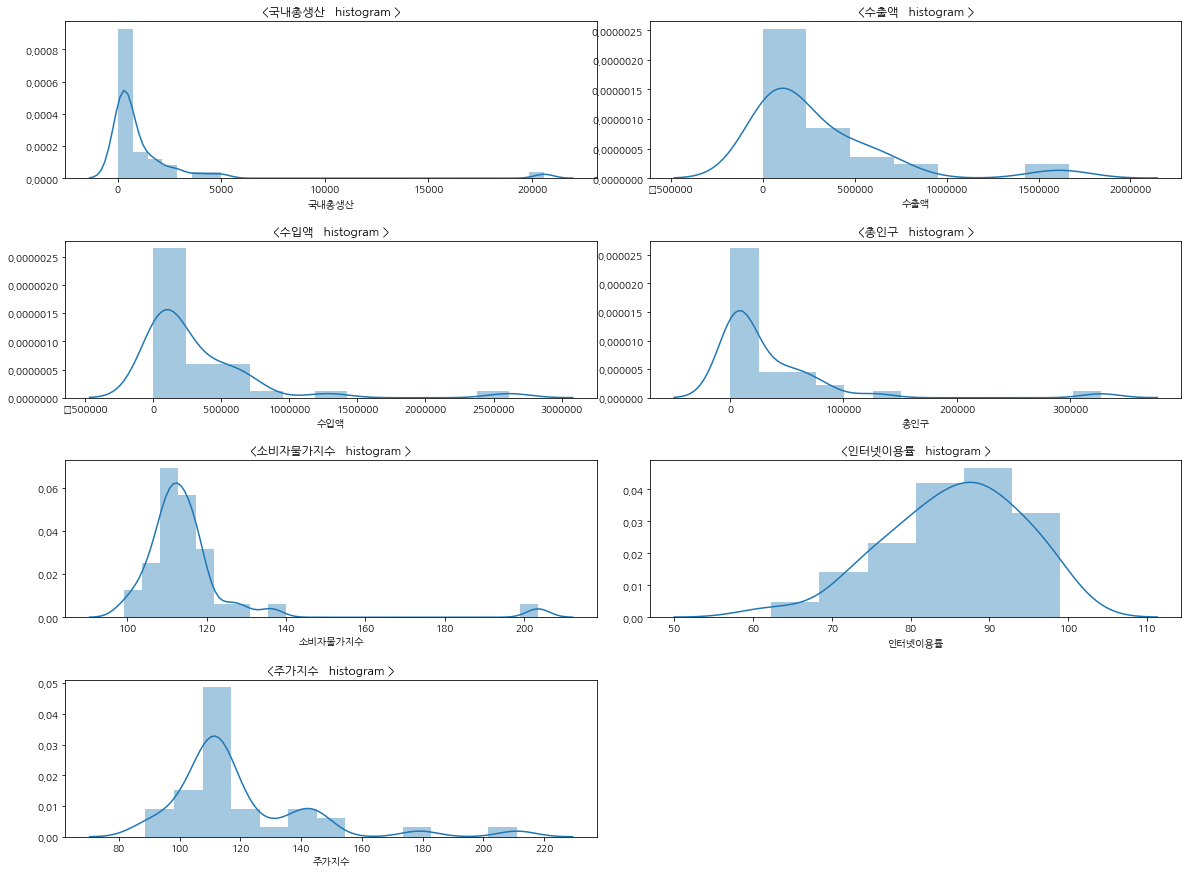

In [148]:
# 변수별 hist plot
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

for i, j in enumerate(use.columns):
    fig.add_subplot(4,2,i+1)
    sns.distplot(data[j])
    plt.title('<' +  j + '   histogram >')

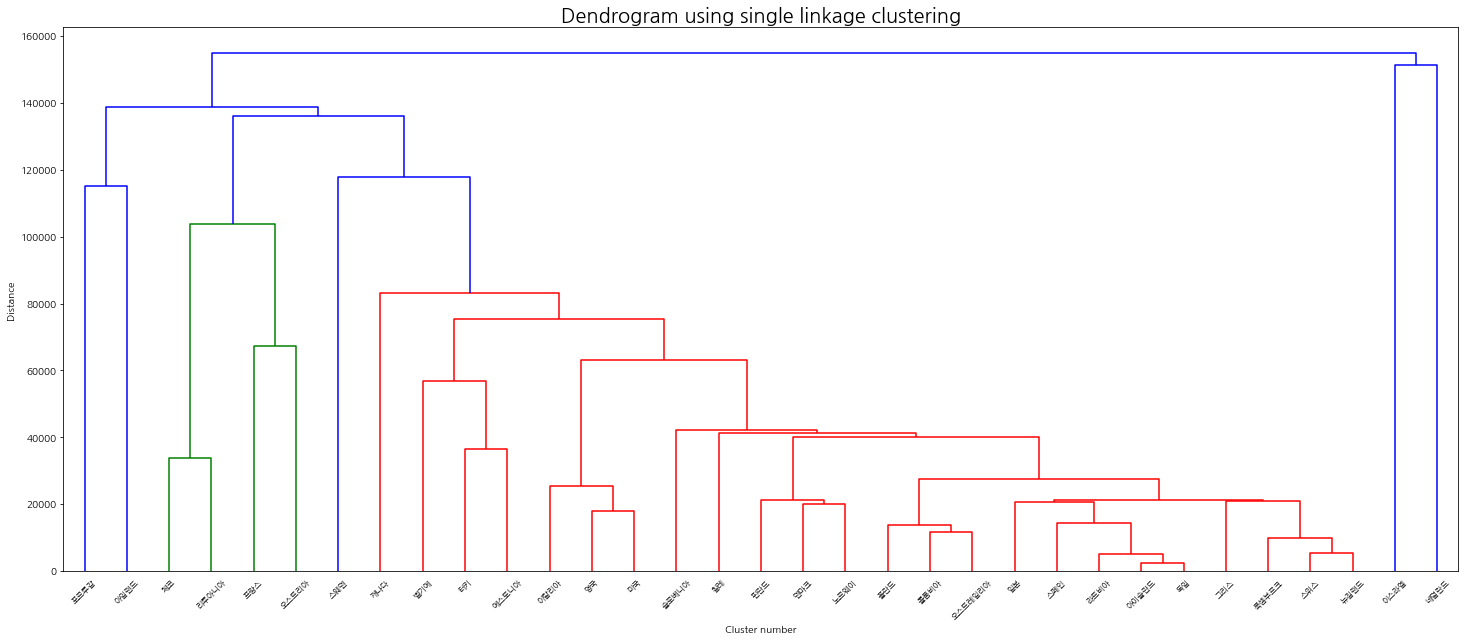

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

labels = list(data['국가별'].values)
clu = linkage(use, method='single')  # single linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using single linkage clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

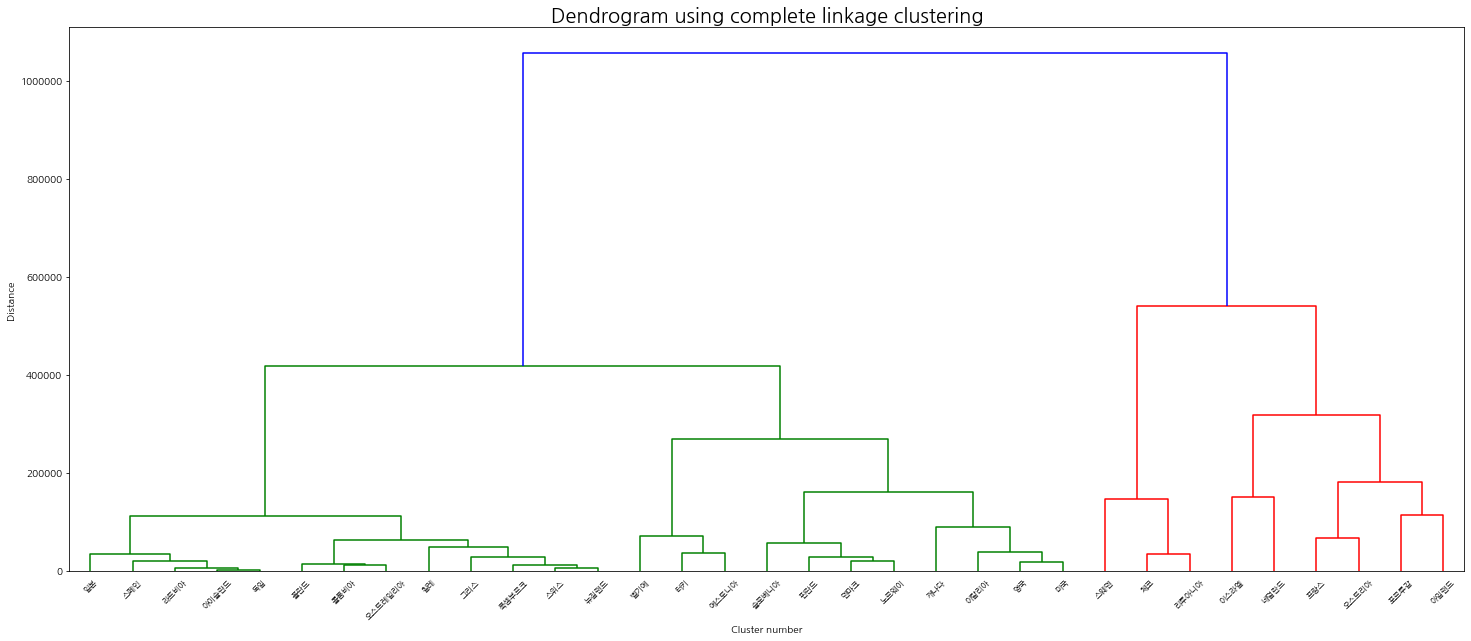

In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

clu = linkage(use, method='complete')  # complete linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using complete linkage clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

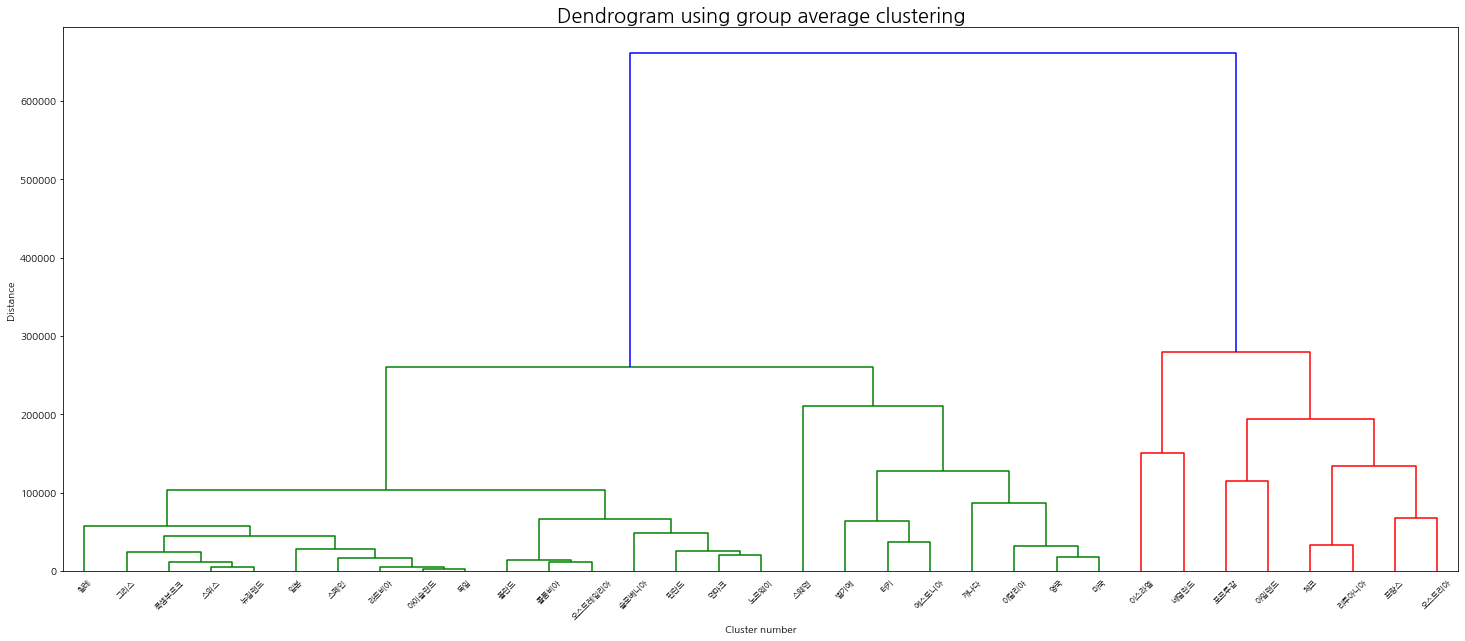

In [151]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

clu = linkage(use, method='average')  # complete linkage
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clu, labels=labels)
plt.title('Dendrogram using group average clustering', fontsize=20)
plt.xlabel('Cluster number')
plt.ylabel('Distance')
plt.show()

In [152]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
re_data['kmeans'] = km.fit_predict(use)

print('Group1 : ', re_data.query('kmeans==0')['국가별'].values)
print('='*70)
print('Group2 : ', re_data.query('kmeans==1')['국가별'].values)
print('='*70)
print('Group3 : ', re_data.query('kmeans==2')['국가별'].values)

Group1 :  ['헝가리' '핀란드' '포르투갈' '콜롬비아' '칠레' '이스라엘' '에스토니아' '아일랜드' '아이슬란드' '슬로베니아'
 '리투아니아' '룩셈부르크' '라트비아' '덴마크' '뉴질랜드' '노르웨이' '그리스']
Group2 :  ['한국' '프랑스' '캐나다' '일본' '이탈리아' '영국' '벨기에' '네덜란드']
Group3 :  ['폴란드' '터키' '체코' '오스트리아' '오스트레일리아' '스페인' '스위스' '스웨덴']


In [153]:
center = pd.DataFrame(km.cluster_centers_.reshape(7,3), columns=['group1', 'group2', 'group3'])
# data.columns = ['Country', 'GDP', 'Export Amount', 'Imported Amount','Population', 'CPI','Internet Utilization', 'Stock Price Index'  ]
center['col'] = ['GDP', 'Export Amount', 'Imported Amount','Population', 'CPI','Internet Utilization', 'Stock Price Index']
center.set_index('col')

,group1,group2,group3
col,,,
GDP,208.547059,57561.117647,56867.941176
Export Amount,8382.588235,114.970588,84.523529
Imported Amount,128.855294,2198.437500,573411.750000
Population,584716.625000,54648.250000,111.100000
CPI,88.275000,109.161375,771.650000
Internet Utilization,236198.875000,241546.875000,28738.500000
Stock Price Index,122.575000,83.912500,112.971500


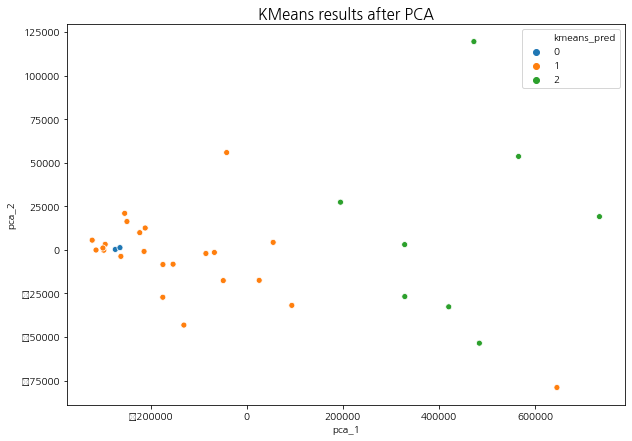

In [154]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit_transform(use)
pca_data = pd.DataFrame(model.fit_transform(use), columns=['pca_1', 'pca_2'])
pca_data['국가'] = data['국가별']
pca_data['kmeans_pred'] = data['kmeans']
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_1', y='pca_2', data=pca_data, hue='kmeans_pred', palette="tab10")
plt.title('KMeans results after PCA', fontsize=15)
plt.show()

In [155]:
re_data.head()

,국가별,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수,kmeans
0,헝가리,157.9,123815,115979,9708,117.7,76.1,179.031,0
1,한국,1725.2,604860,535202,51607,104.5,95.9,115.704,1
2,핀란드,275.9,75869,78624,5523,111.2,88.9,115.051,0
3,프랑스,2787.9,581773,671434,64991,108.8,82.0,111.781,1
4,폴란드,587.1,263494,268880,37922,111.6,77.5,114.101,2


In [156]:
re_data.set_index('국가별', inplace=True)

In [157]:
## 스케일링 후 시각화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
re_data_ss = ss.fit_transform(re_data.values)
scale = pd.DataFrame(re_data_ss, columns=re_data.columns).drop(['kmeans'], axis=1)
# scale['국가'] = re_data.index

In [158]:
scale['pred'] = km.fit_predict(use)

In [159]:
list(scale.query('pred==0').index)

[4, 6, 10, 14, 15, 21, 22, 23]

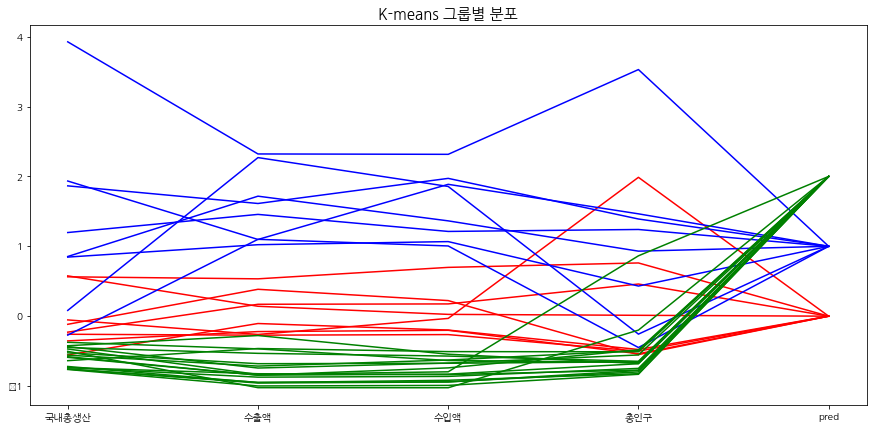

In [160]:
fig = plt.figure(figsize=(15, 7))

ss = scale[['국내총생산', '수출액', '수입액', '총인구', 'pred']]
for i in list(ss.query('pred==0').index):
    plt.plot(ss.T.index, ss.T[i], color='red')
for i in list(ss.query('pred==1').index):
    plt.plot(ss.T.index, ss.T[i], color='blue')
for i in list(ss.query('pred==2').index):
    plt.plot(ss.T.index, ss.T[i], color='green')
    
plt.title('K-means 그룹별 분포', fontsize=15)
plt.show()

In [162]:
re_data.query('kmeans==0')

,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수,kmeans
국가별,,,,,,,,
헝가리,157.9,123815,115979,9708,117.7,76.1,179.031,0
핀란드,275.9,75869,78624,5523,111.2,88.9,115.051,0
포르투갈,241.3,68310,88972,10256,110.3,74.7,122.551,0
콜롬비아,333.6,41905,51230,49661,136.2,62.3,116.327,0
칠레,298.3,118,117,18729,128.6,82.3,145.250,0
이스라엘,370.6,62159,79261,8382,107.2,81.6,88.734,0
에스토니아,30.7,17019,19153,1323,119.4,89.4,144.168,0
아일랜드,382.7,164794,107669,4819,105.6,84.5,106.529,0
아이슬란드,25.7,5562,7655,337,125.2,99.0,114.735,0


In [163]:
re_data.query('kmeans==1')

,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수,kmeans
국가별,,,,,,,,
한국,1725.2,604860,535202,51607,104.5,95.9,115.704,1
프랑스,2787.9,581773,671434,64991,108.8,82.0,111.781,1
캐나다,1716.3,451657,468706,37075,114.5,91.0,109.705,1
일본,4954.8,738195,748526,127202,105.0,84.6,111.470,1
이탈리아,2085.8,547339,501297,60627,110.0,74.4,103.897,1
영국,2860.7,468137,652332,67142,117.6,94.9,111.528,1
벨기에,542.7,468637,454735,11482,115.5,88.7,96.552,1
네덜란드,914.1,726696,645501,17060,112.9,94.7,112.654,1


In [164]:
re_data.query('kmeans==2')

,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수,kmeans
국가별,,,,,,,,
폴란드,587.1,263494,268880,37922,111.6,77.5,114.101,2
터키,771.4,168228,222444,82340,203.5,71.0,126.263,2
체코,245.0,202751,185102,10666,113.3,80.7,109.130,2
오스트리아,455.5,177296,184310,8891,116.3,87.7,139.435,2
오스트레일리아,1433.9,257212,235374,24898,117.9,86.5,109.205,2
스페인,1419.7,343836,386073,46693,110.2,86.1,89.796,2
스위스,705.1,310836,279600,8526,99.2,89.7,104.920,2
스웨덴,555.5,165938,170592,9972,108.6,92.1,110.922,2


In [165]:
re_data.columns

Index(['국내총생산', '수출액', '수입액', '총인구', '소비자물가지수', '인터넷이용률', '주가지수', 'kmeans'], dtype='object')

In [166]:
re_data.groupby('kmeans')['국내총생산', '수출액', '수입액', '총인구', '소비자물가지수', '인터넷이용률', '주가지수'].mean()

,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수
kmeans,,,,,,,
0,208.547059,57561.117647,56867.941176,8382.588235,114.970588,84.523529,128.855294
1,2198.437500,573411.750000,584716.625000,54648.250000,111.100000,88.275000,109.161375
2,771.650000,236198.875000,241546.875000,28738.500000,122.575000,83.912500,112.971500
